In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Exámen Final

## Modelado de pendubot

### Variables de estado, posiciones y velocidades

$$
q = 
\begin{pmatrix}
q_1 \\
q_2
\end{pmatrix} \implies
\dot{q} =
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix}
$$

Las posiciones de las juntas estan dadas por:

$$
\begin{align}
\begin{pmatrix}
x_1 & y_1
\end{pmatrix} &= 
\begin{pmatrix}
l_1 \cos{(q_1)} & l_1 \sin{(q_1)}
\end{pmatrix} \\
\begin{pmatrix}
x_2 & y_2
\end{pmatrix} &= 
\begin{pmatrix}
l_1 \cos{(q_1)} + l_2 \cos{(q_1 + q_2)} & l_1 \sin{(q_1)} + l_2 \sin{(q_1 + q_2)}
\end{pmatrix}
\end{align}
$$

y por lo tanto, las velocidades estarán dadas por:

$$
\begin{align}
\begin{pmatrix}
\dot{x}_1 & \dot{y}_1
\end{pmatrix} &= 
\begin{pmatrix}
-l_1 \sin{(q_1)} \dot{q}_1 & l_1 \cos{(q_1)} \dot{q}_1
\end{pmatrix} \\
\begin{pmatrix}
\dot{x}_2 & \dot{y}_2
\end{pmatrix} &= 
\begin{pmatrix}
-l_1 \sin{(q_1)} \dot{q}_1 - l_2 \sin{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2) & l_1 \cos{(q_1)} \dot{q}_1 + l_2 \cos{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2)
\end{pmatrix}
\end{align}
$$

### Energía cinética

Considerando que la velocidad $v_i$ es la norma de estas componentes, $v_i = \sqrt{\dot{x}_i^2 + \dot{y}_i^2}$, la energía cinética del sistema esta dada dada por:

$$
\begin{align}
K &= K_1 + K_2 \\
&= \frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2
\end{align}
$$

con $v_1^2$ dada por:

$$
\begin{align}
v_1^2 &= \dot{x}_1^2 + \dot{y}_1^2 \\
&= l_1^2 \sin^2{(q_1)} \dot{q}_1^2 + l_1^2 \cos^2{(q_1)} \dot{q}_1^2 \\
&= l_1^2 \dot{q}_1^2
\end{align}
$$

y $v_2^2$:

$$
\begin{align}
v_2^2 &= \dot{x}_2^2 + \dot{y}_2^2 \\
&= \left( -l_1 \sin{(q_1)} \dot{q}_1 - l_2 \sin{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2) \right)^2 + \left( l_1 \cos{(q_1)} \dot{q}_1 + l_2 \cos{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2) \right)^2 \\
&= l_1^2 \dot{q}_1^2 + l_2^2 (\dot{q}_1 + \dot{q}_2)^2 + 2\left[ l_1 \sin{(q_1)} \dot{q}_1 \cdot l_2 \sin{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2) + l_1 \cos{(q_1)} \dot{q}_1 \cdot l_2 \cos{(q_1 + q_2)} (\dot{q}_1 + \dot{q}_2) \right] \\
&= l_1^2 \dot{q}_1^2 + l_2^2 (\dot{q}_1 + \dot{q}_2)^2 + 2 l_1 l_2 \left[ \sin{(q_1)} \sin{(q_1 + q_2)} + \cos{(q_1)} \cos{(q_1 + q_2)} \right] \dot{q}_1 (\dot{q}_1 + \dot{q}_2) \\
&= l_1^2 \dot{q}_1^2 + l_2^2 (\dot{q}_1 + \dot{q}_2)^2 + 2 l_1 l_2 \cos{(q_2)} \dot{q}_1 (\dot{q}_1 + \dot{q}_2)
\end{align}
$$

por lo que las energías cinéticas de cada junta quedan:

$$
\begin{align}
K_1 &= \frac{1}{2} m_1 v_1^2 = \frac{1}{2} m_1 l_1^2 \dot{q}_1^2 \\
K_2 &= \frac{1}{2} m_2 v_2^2 = \frac{1}{2} m_2 \left[ l_1^2 \dot{q}_1^2 + l_2^2 (\dot{q}_1 + \dot{q}_2)^2 + 2 l_1 l_2 \cos{(q_2)} \dot{q}_1 (\dot{q}_1 + \dot{q}_2) \right] \\
&= \frac{1}{2} m_2 \left[ l_1^2 \dot{q}_1^2 + l_2^2 \dot{q}_1^2 + l_2^2 \dot{q}_2^2 + 2 l_2^2 \dot{q}_1 \dot{q}_2 + 2 l_1 l_2 \cos{(q_2)} \dot{q}_1^2 + 2 l_1 l_2 \cos{(q_2)} \dot{q}_1 \dot{q}_2 \right] \\
&= \frac{1}{2} m_2 \left[ \left( l_1^2 + l_2^2 + 2 l_1 l_2 \cos{(q_2)} \right) \dot{q}_1^2 + l_2^2 \dot{q}_2^2 + 2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2 \right]
\end{align}
$$

por lo que la energía cinética total, será:

$$
\begin{align}
K &= K_1 + K_2 \\
&= \frac{1}{2} m_1 l_1^2 \dot{q}_1^2 + \frac{1}{2} m_2 \left[ \left( l_1^2 + l_2^2 + 2 l_1 l_2 \cos{(q_2)} \right) \dot{q}_1^2 + l_2^2 \dot{q}_2^2 + 2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2 \right] \\
&= \frac{1}{2} \left\{ m_1 l_1^2 \dot{q}_1^2 + m_2 \left[ \left( l_1^2 + l_2^2 + 2 l_1 l_2 \cos{(q_2)} \right) \dot{q}_1^2 + l_2^2 \dot{q}_2^2 + 2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2 \right] \right\} \\
&= \frac{1}{2} \left\{ \left[ m_1 l_1^2 + m_2 \left( l_1^2 + l_2^2 + 2 l_1 l_2 \cos{(q_2)} \right) \right] \dot{q}_1^2 + m_2 l_2^2 \dot{q}_2^2 + 2 m_2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2\right\} \\
&= \frac{1}{2} \left\{ \left[ (m_1 + m_2) l_1^2 + m_2 l_2^2 + 2 m_2 l_1 l_2 \cos{(q_2)} \right] \dot{q}_1^2 + m_2 l_2^2 \dot{q}_2^2 + 2 m_2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2\right\} \\
\end{align}
$$

La cual, al ver las relaciones con las variables de posición generalizadas del pendulo, podemos escribir como:

$$
K = \frac{1}{2} \dot{q}^T M(q) \dot{q}
$$

en donde la matriz de inercia $M(q)$ queda de la forma:

$$
M(q) =
\begin{pmatrix}
(m_1 + m_2) l_1^2 + m_2 l_2^2 + 2 m_2 l_1 l_2 \cos{(q_2)} & m_2 l_2^2 + m_2 l_1 l_2 \cos{(q_2)} \\
m_2 l_2^2 + m_2 l_1 l_2 \cos{(q_2)} & m_2 l_2^2
\end{pmatrix}
$$

en donde podemos introducir las constantes $\mu_i$ para simplificar la notación:

$$
\begin{align}
\mu_1 &= (m_1 + m_2) l_1^2 \\
\mu_2 &= m_2 l_2^2 \\
\mu_3 &= m_2 l_1 l_2
\end{align}
$$

con lo que la expresión para la energía cinética queda:

$$
K = \frac{1}{2} \dot{q}^T
\begin{pmatrix}
\mu_1 + \mu_2 + 2\mu_3 \cos{(q_2)} & \mu_2 + \mu_3 \cos{(q_2)} \\
\mu_2 + \mu_3 \cos{(q_2)} & \mu_2
\end{pmatrix} \dot{q}
$$

### Energía potencial

La energía potencial del sistema esta dada por:

$$
\begin{align}
U &= U_1 + U_2 \\
&= m_1 g h_1 + m_2 g h_2 \\
&= m_1 g y_1 + m_2 g y_2 \\
&= m_1 g l_1 \sin{(q_1)} + m_2 g \left[ l_1 \sin{(q_1)} + l_2 \sin{(q_1 + q_2)} \right] \\
&= \left( m_1 + m_2 \right) g l_1 \sin{(q_1)} + m_2 g l_2 \sin{(q_1 + q_2)} \\
&= g \left[ \left( m_1 + m_2 \right) l_1 \sin{(q_1)} + m_2 l_2 \sin{(q_1 + q_2)} \right] \\
\end{align}
$$

### Lagrangiano

El Lagrangiano del sistema, esta dado por la expresión:

$$
L = K - U
$$

por lo que solo queda sumar las dos expresiones y obtener las condiciones de optimalidad para la energía del sistema por medio de la ecuación de Euler-Lagrange

### Euler-Lagrange

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} = 0
$$

Si empezamos derivando con respecto a $\dot{q}$, tendremos:

$$
\frac{\partial L}{\partial \dot{q}} = \frac{\partial K}{\partial \dot{q}} - \frac{\partial U}{\partial \dot{q}}
$$

y obteniendo cada uno de estos tenemos que:

$$
\begin{align}
\frac{\partial K}{\partial \dot{q}} &= K_{\dot{q}} = \frac{\partial}{\partial \dot{q}} \left\{ \frac{1}{2} \dot{q}^T M(q) \dot{q} \right\} = M(q) \dot{q} \\
\frac{\partial U}{\partial \dot{q}} &= U_{\dot{q}} = 0
\end{align}
$$

y la derivada con respecto al tiempo de estos terminos será:

$$
\begin{align}
\frac{d K_{\dot{q}}}{dt} &= M(q) \ddot{q} + \dot{M}(q, \dot{q}) \dot{q} \\
\frac{d U_{\dot{q}}}{dt} &= 0
\end{align}
$$

en donde:

$$
\begin{align}
\dot{M}(q, \dot{q}) &= \frac{d}{dt}
\begin{pmatrix}
\mu_1 + \mu_2 + 2\mu_3 \cos{(q_2)} & \mu_2 + \mu_3 \cos{(q_2)} \\
\mu_2 + \mu_3 \cos{(q_2)} & \mu_2
\end{pmatrix} \\
&=
\begin{pmatrix}
-2 \mu_3 \sin{(q_2)} \dot{q}_2 & -\mu_3 \sin{(q_2)} \dot{q}_2 \\
-\mu_3 \sin{(q_2)} \dot{q}_2 & 0
\end{pmatrix} \\
&= -\mu_3 \sin{(q_2)}
\begin{pmatrix}
2 \dot{q}_2 & \dot{q}_2 \\
\dot{q}_2 & 0
\end{pmatrix}
\end{align}
$$

Ahora, derivando con respecto a $q$, tenemos:

$$
\frac{\partial L}{\partial q} = \frac{\partial K}{\partial q} - \frac{\partial U}{\partial q}
$$

en donde:

$$
\begin{align}
\frac{\partial K}{\partial q} = K_{q} &=
\begin{pmatrix}
\frac{\partial K}{\partial q_1} \\
\frac{\partial K}{\partial q_2}
\end{pmatrix} \\
&= \frac{1}{2}
\begin{pmatrix}
\frac{\partial}{\partial q_1} \left\{ \left[ (m_1 + m_2) l_1^2 + m_2 l_2^2 + 2 m_2 l_1 l_2 \cos{(q_2)} \right] \dot{q}_1^2 + m_2 l_2^2 \dot{q}_2^2 + 2 m_2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2 \right\} \\
\frac{\partial}{\partial q_2} \left\{ \left[ (m_1 + m_2) l_1^2 + m_2 l_2^2 + 2 m_2 l_1 l_2 \cos{(q_2)} \right] \dot{q}_1^2 + m_2 l_2^2 \dot{q}_2^2 + 2 m_2 \left( l_2^2 + l_1 l_2 \cos{(q_2)} \right) \dot{q}_1 \dot{q}_2 \right\} \\
\end{pmatrix} \\
&= \frac{1}{2}
\begin{pmatrix}
0 \\
-2 m_2 l_1 l_2 \sin{(q_2)} \dot{q}_1^2 - 2 m_2 l_1 l_2 \sin{(q_2)} \dot{q}_1 \dot{q}_2 \\
\end{pmatrix} \\
&= - \mu_3 \sin{(q_2)}
\begin{pmatrix}
0 \\
\dot{q}_1^2 + \dot{q}_1 \dot{q}_2 \\
\end{pmatrix} = -\mu_3 \sin{(q_2)}
\begin{pmatrix}
\dot{q}_2 & -\dot{q}_1 \\
\dot{q}_1 + \dot{q}_2 & 0
\end{pmatrix} \dot{q}
\end{align}
$$

y para la energía potencial:

$$
\begin{align}
\frac{\partial U}{\partial q} = U_q &=
\begin{pmatrix}
\frac{\partial U}{\partial q_1} \\
\frac{\partial U}{\partial q_2}
\end{pmatrix} \\
&= g
\begin{pmatrix}
\frac{\partial}{\partial q_1} \left[ \left( m_1 + m_2 \right) l_1 \sin{(q_1)} + m_2 l_2 \sin{(q_1 + q_2)} \right] \\
\frac{\partial}{\partial q_2} \left[ \left( m_1 + m_2 \right) l_1 \sin{(q_1)} + m_2 l_2 \sin{(q_1 + q_2)} \right]
\end{pmatrix} \\
&= g
\begin{pmatrix}
\left( m_1 + m_2 \right) l_1 \cos{(q_1)} + m_2 l_2 \cos{(q_1 + q_2)} \\
m_2 l_2 \cos{(q_1 + q_2)}
\end{pmatrix}
\end{align}
$$

o bien:

$$
U_q = g
\begin{pmatrix}
\mu_4 \cos{(q_1)} + \mu_5 \cos{(q_1 + q_2)} \\
\mu_5 \cos{(q_1 + q_2)}
\end{pmatrix}
$$

con $\mu_4 = \left( m_1 + m_2 \right) l_1$ y $\mu_5 = m_2 l_2$, por lo que la ecuación de Euler-Lagrange queda:

$$
\begin{align}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) &- \frac{\partial L}{\partial q} = 0 \\
\frac{d K_{\dot{q}}}{dt} &- \left( K_q - U_q \right) = 0 \\
M(q) \ddot{q} + \dot{M}(q, \dot{q}) \dot{q} &- K_q + U_q = 0
\end{align}
$$

en donde recordando que $K_q$ tiene la forma $F(q, \dot{q}) \dot{q}$, podemos juntar esta matriz con $\dot{M}(q, \dot{q})$ y obtener una expresión de la forma:

$$
M(q) \ddot{q} + C(q, \dot{q}) \dot{q} + U_q = 0
$$

en donde:

$$
\begin{align}
M(q) &=
\begin{pmatrix}
\mu_1 + \mu_2 + 2\mu_3 \cos{(q_2)} & \mu_2 + \mu_3 \cos{(q_2)} \\
\mu_2 + \mu_3 \cos{(q_2)} & \mu_2
\end{pmatrix} \\
C(q, \dot{q}) &= \dot{M}(q, \dot{q}) - F(q, \dot{q}) =
\mu_3 \sin{(q_2)}
\begin{pmatrix}
\dot{q}_2 & \dot{q}_1 + \dot{q}_2 \\
-\dot{q}_1 & 0
\end{pmatrix} \\
U_q &= g
\begin{pmatrix}
\mu_4 \cos{(q_1)} + \mu_5 \cos{(q_1 + q_2)} \\
\mu_5 \cos{(q_1 + q_2)}
\end{pmatrix}
\end{align}
$$

con

$$
\begin{align}
\mu_1 &= (m_1 + m_2) l_1^2 \\
\mu_2 &= m_2 l_2^2 \\
\mu_3 &= m_2 l_1 l_2 \\
\mu_4 &= \left( m_1 + m_2 \right) l_1 \\
\mu_5 &= m_2 l_2
\end{align}
$$

sin embargo este modelo no considera las señales de control, por lo que procederemos a analizar el sistema.

### Señales de control

Nuestra señal de control escalar se deberá enlazar al actuador del pendubot, el cual esta asociado al primer grado de libertad $q_1$, por lo que finalmente tenemos la ecuación:

$$
M(q) \ddot{q} + C(q, \dot{q}) \dot{q} + U_q = G u
$$

con:

$$
G =
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

In [16]:
def f(estado, tiempo):
    from numpy import matrix, zeros, cos, sin
    
    m1 = 0.2 # kg
    m2 = 0.6 # kg
    l1 = 0.6 # m
    l2 = 0.3 # m
    g = 9.81 # m/s^2
    
    μ1 = (m1 + m2)*l1**2
    μ2 = m2*l2**2
    μ3 = m2*l1*l2
    μ4 = (m1 + m2)*l1
    μ5 = m2*l2
    
    q1, q2, q̇1, q̇2 = estado
    
    q = matrix([[q1], [q2]])
    q̇ = matrix([[q̇1], [q̇2]])

    M = matrix([[μ1 + μ2 + 2*μ3*cos(q2), μ2 + μ3*cos(q2)],
                [μ2 + μ3*cos(q2), μ2]])
    
    C = μ3*sin(q2)*matrix([[ q̇2, q̇1 + q̇2],
                           [-q̇1, 0]])
    
    U = g*matrix([[μ4*cos(q1) + μ5*cos(q1 + q2)],
                  [μ5*cos(q1 + q2)]])
    
    q̈ = M.I*(-C*q̇ - U)
    
    ẏ = zeros(4)
    
    ẏ[0] = q̇1
    ẏ[1] = q̇2
    ẏ[2] = q̈[0]
    ẏ[3] = q̈[1]
    
    return ẏ

In [27]:
from scipy.integrate import odeint
from numpy import pi, linspace, sin, cos, arange
τ = 2*pi

In [18]:
ts = linspace(0, 5, 500)
estado_inicial = [τ/4, 0.1, 0, 0]
estados = odeint(f, estado_inicial, ts)
q1, q2 = estados[:, 0], estados[:, 1]

In [19]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")

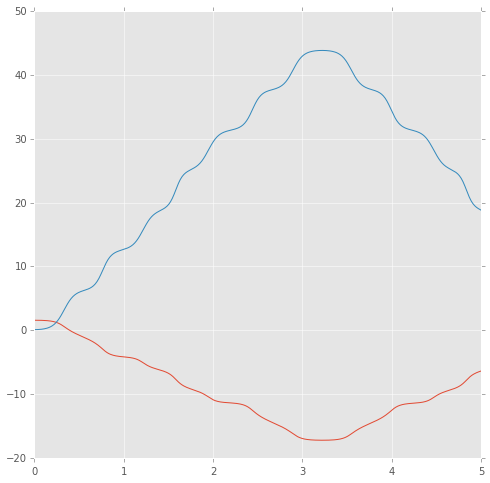

In [20]:
fig = figure(figsize=(8, 8))
plot(ts, q1)
plot(ts, q2)

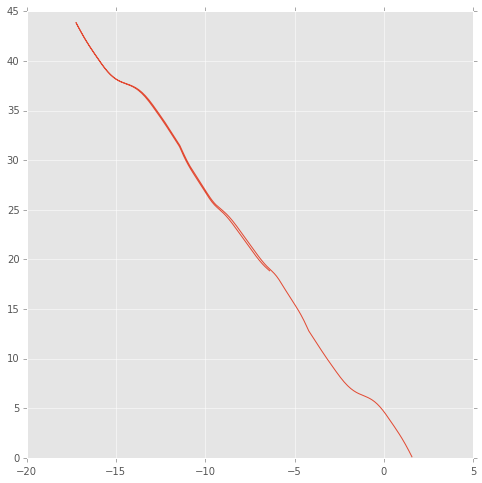

In [21]:
f = figure(figsize=(8, 8))
plot(q1, q2)

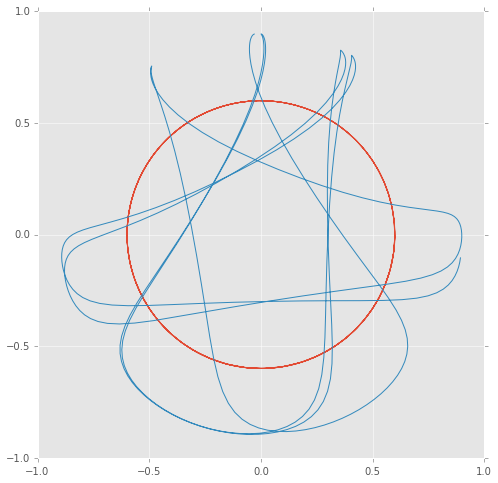

In [23]:
fig = figure(figsize=(8, 8))
l1 = 0.6 # m
l2 = 0.3 # m
x1 = l1*cos(q1)
y1 = l1*sin(q1)
x2 = x1 + l2*cos(q1 + q2)
y2 = y1 + l2*sin(q1 + q2)
plot(x1, y1)
plot(x2, y2)

In [25]:
from matplotlib import animation

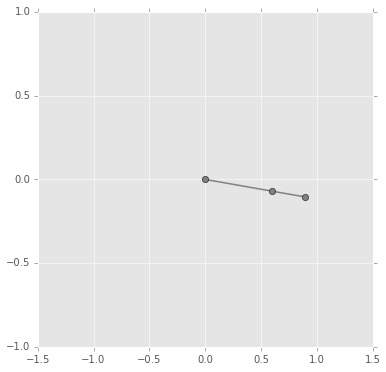

In [34]:
fig = figure(figsize=(6, 6))

ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(-1.5, 1.5), ylim=(-1, 1))

linea, = ax.plot([], [], 'o-', lw=1.5, color='gray')

def init():
    linea.set_data([], [])
    return linea

def animate(i):
    linea.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    return linea

ani = animation.FuncAnimation(fig, animate, arange(1, len(x1)), interval=25,
                              blit=True, init_func=init)

ani.save('./imagenes/doublependulum.gif', writer='imagemagick');

![pendulo](./imagenes/doublependulum.gif)